In [2]:
import pandas as pd

# Load the data
file_path = '/content/Stores.csv'
df = pd.read_csv(file_path)

print(df.info())

print(df.head())

print(df.isnull().sum())

print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store ID              896 non-null    int64
 1   Store_Area            896 non-null    int64
 2   Items_Available       896 non-null    int64
 3   Daily_Customer_Count  896 non-null    int64
 4   Store_Sales           896 non-null    int64
dtypes: int64(5)
memory usage: 35.1 KB
None
   Store ID   Store_Area  Items_Available  Daily_Customer_Count  Store_Sales
0          1        1659             1961                   530        66490
1          2        1461             1752                   210        39820
2          3        1340             1609                   720        54010
3          4        1451             1748                   620        53730
4          5        1770             2111                   450        46620
Store ID                0
Store_Area           

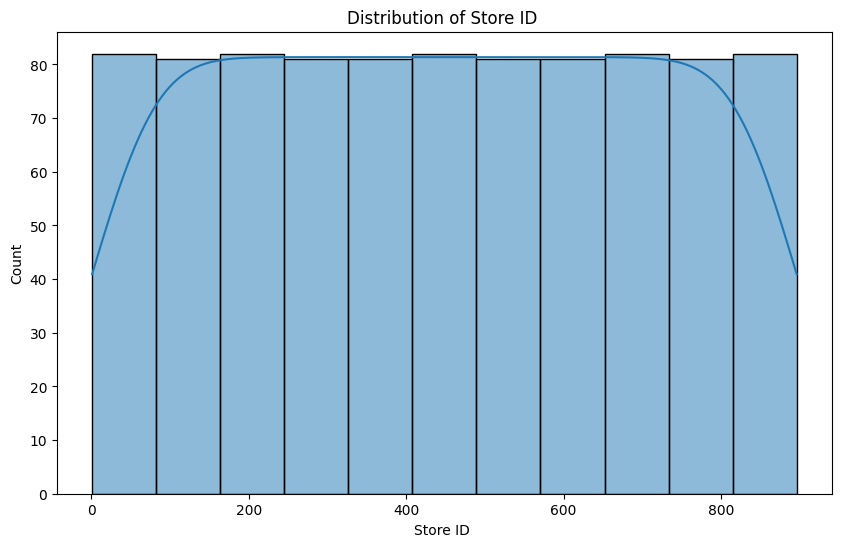

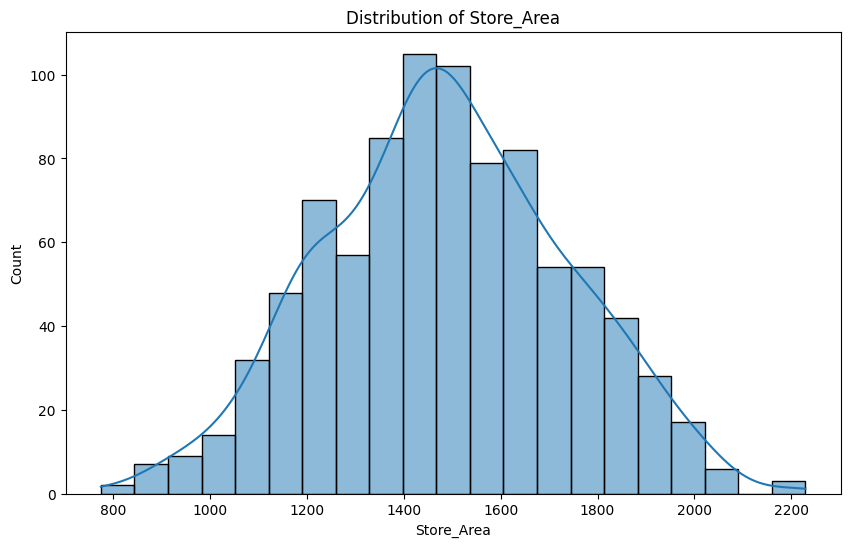

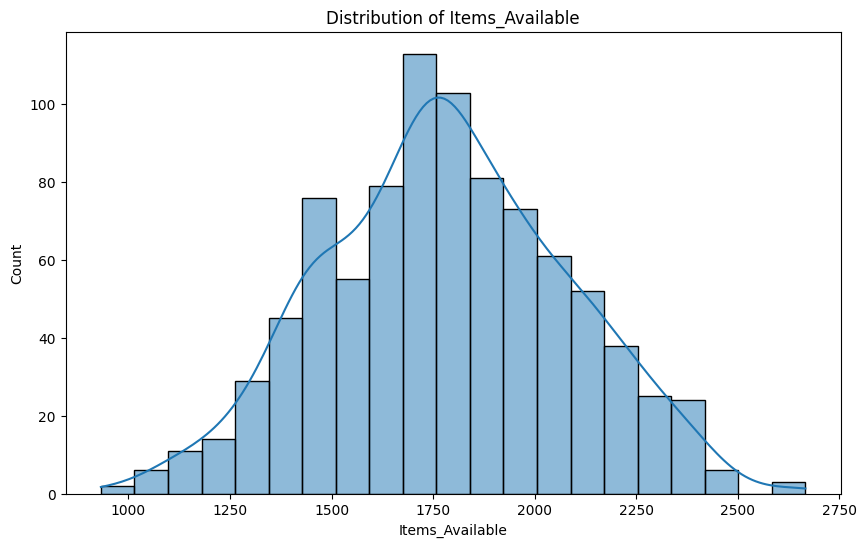

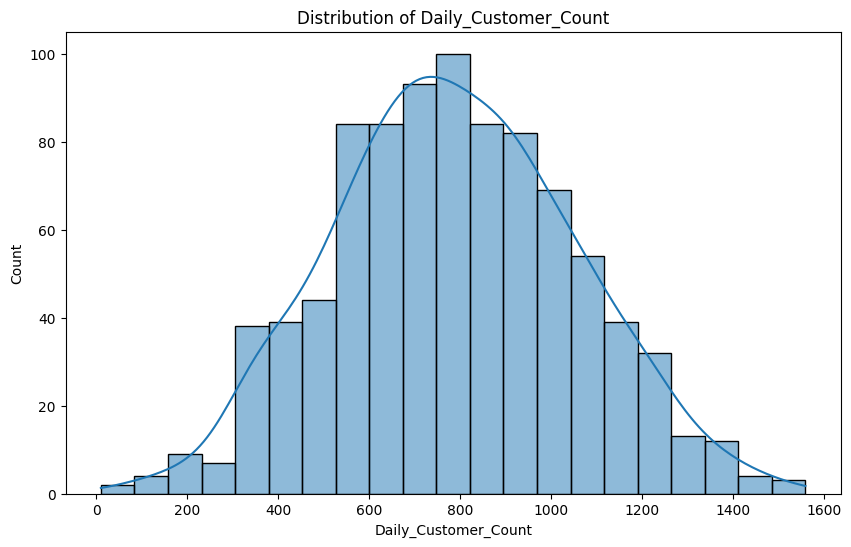

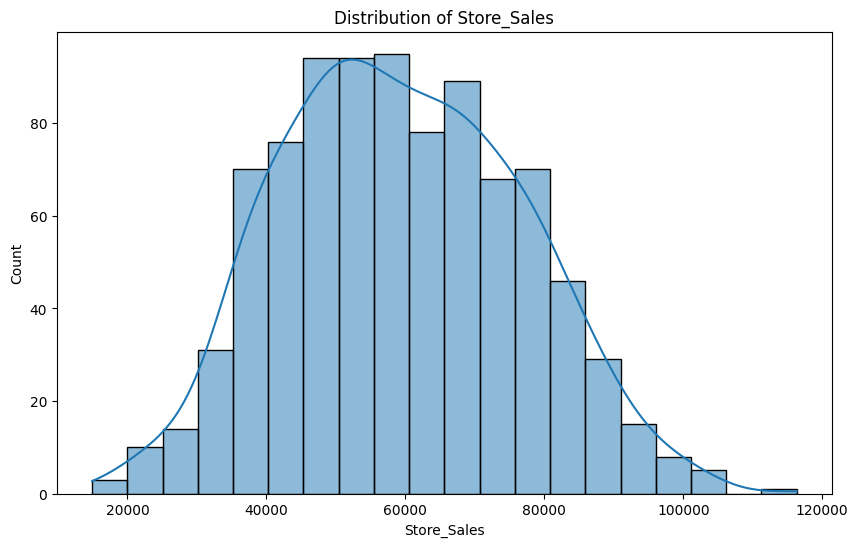

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting distribution for numeric features
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns

for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()
categorical_features = df.select_dtypes(include=['object']).columns

for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=df[feature])
    plt.title(f'Distribution of {feature}')
    plt.show()


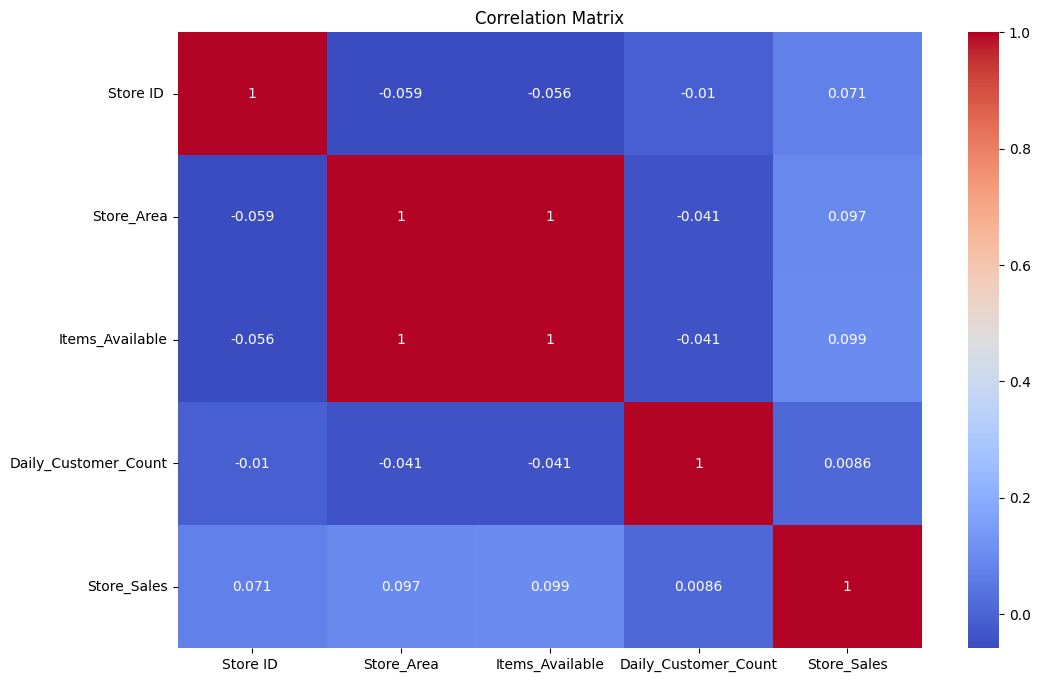

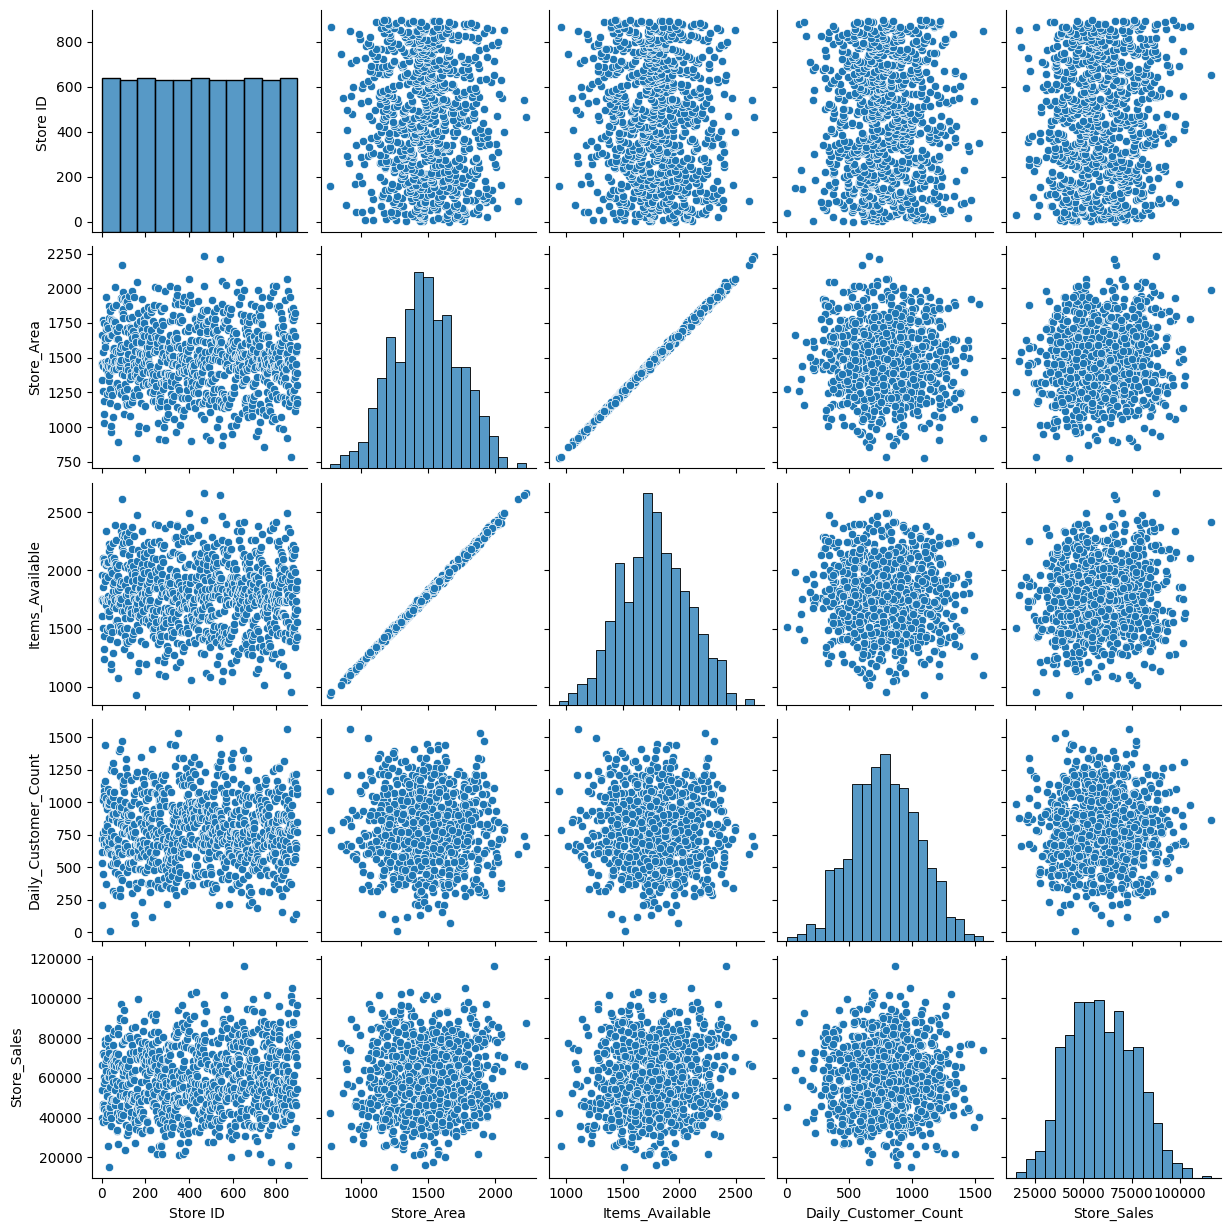

In [4]:
# Correlation matrix for numeric features
plt.figure(figsize=(12, 8))
correlation_matrix = df[numeric_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Pairplot to visualize relationships between numeric variables
sns.pairplot(df[numeric_features])
plt.show()

# Bivariate analysis for categorical vs numeric features
for cat_feature in categorical_features:
    for num_feature in numeric_features:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=df[cat_feature], y=df[num_feature])
        plt.title(f'{cat_feature} vs {num_feature}')
        plt.show()


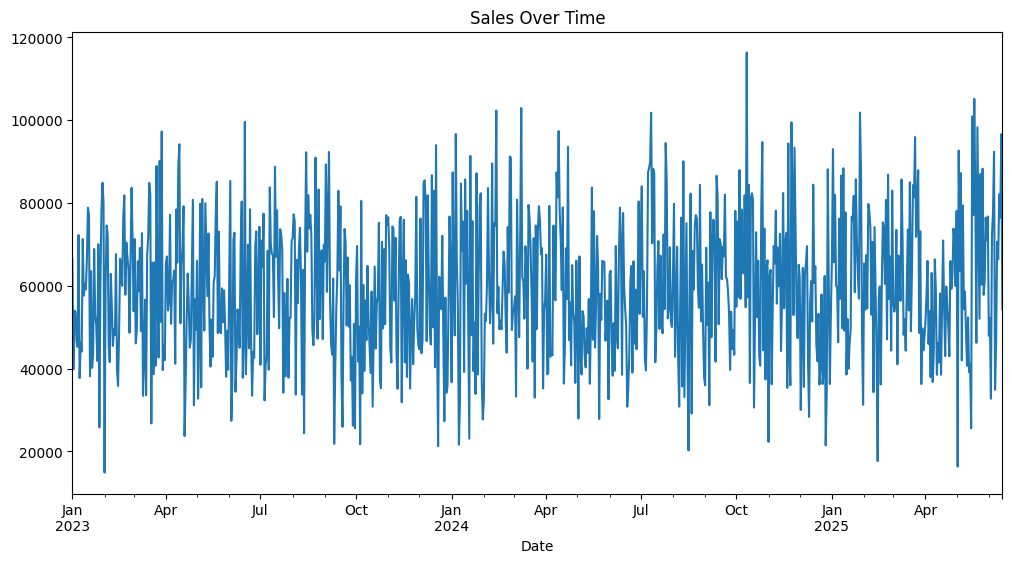

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:            Store_Sales   No. Observations:                  896
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -10007.368
Date:                Sun, 25 Aug 2024   AIC                          20020.735
Time:                        13:12:42   BIC                          20035.126
Sample:                    01-01-2023   HQIC                         20026.234
                         - 06-14-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0247      0.040      0.621      0.534      -0.053       0.103
ma.L1         -0.9949      0.006   -167.043      0.000      -1.007      -0.983
sigma2      3.472e+08   1.13e-12   3.08e+20      0.0

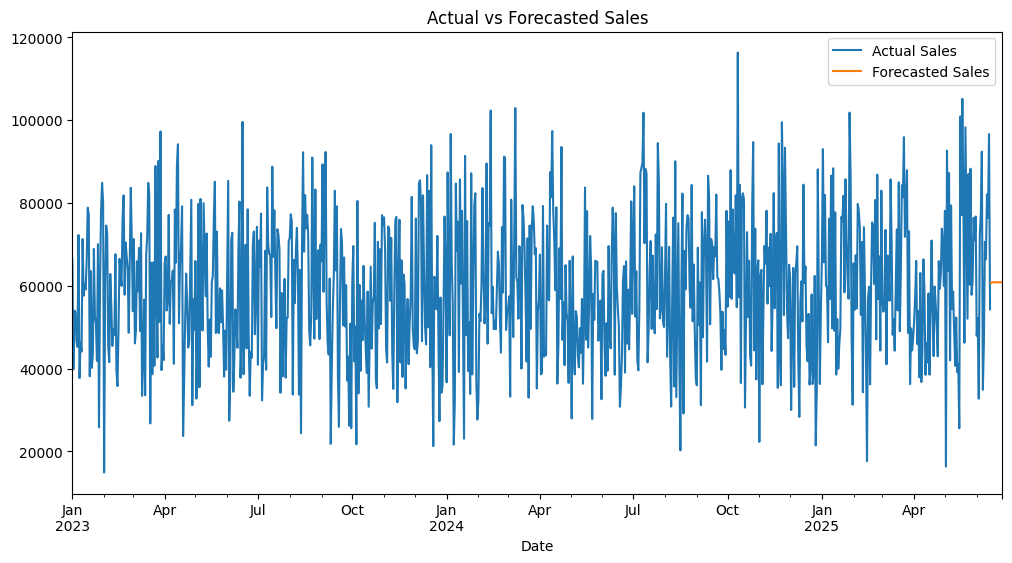

In [8]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

# Assuming there is a 'Date' column and a target variable 'Store_Sales'
# The DataFrame does not have a Date column, so I am creating one and populating it with random dates
# Replace this with your actual date column or logic to create the date column
df['Date'] = pd.to_datetime(pd.date_range('2023-01-01', periods=len(df)))
df.set_index('Date', inplace=True)

# Continue with the rest of your code for ARIMA modeling
# Plot the time series data
# Changed 'Sales' column to 'Store_Sales'
df['Store_Sales'].plot(figsize=(12, 6))
plt.title('Sales Over Time')
plt.show()

# Fit the ARIMA model
# Changed 'Sales' column to 'Store_Sales'
arima_model = ARIMA(df['Store_Sales'], order=(1, 1, 1))
arima_result = arima_model.fit()

# Print model summary
print(arima_result.summary())

# Forecasting future values
forecast = arima_result.forecast(steps=12)  # Forecasting the next 12 periods
print(forecast)

# Plot the forecast
# Changed 'Sales' column to 'Store_Sales'
df['Store_Sales'].plot(figsize=(12, 6), label='Actual Sales')
forecast.plot(label='Forecasted Sales')
plt.title('Actual vs Forecasted Sales')
plt.legend()
plt.show()